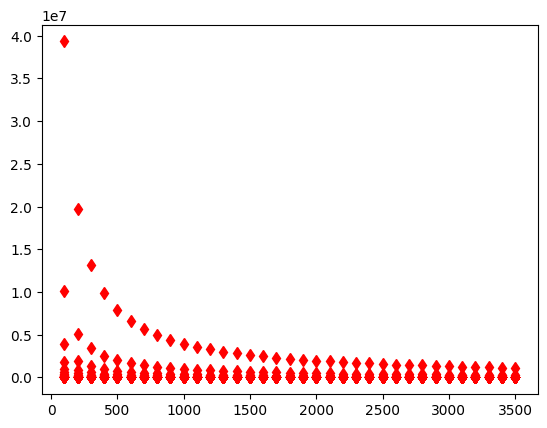

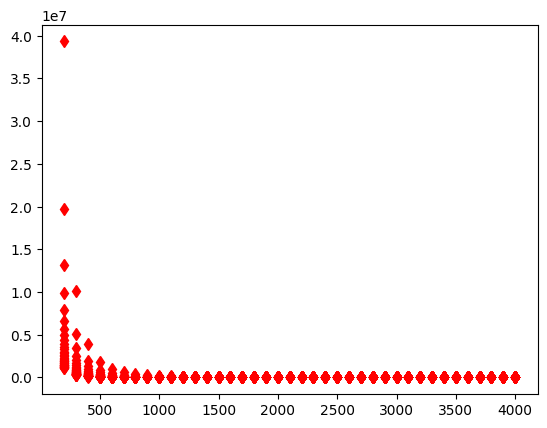

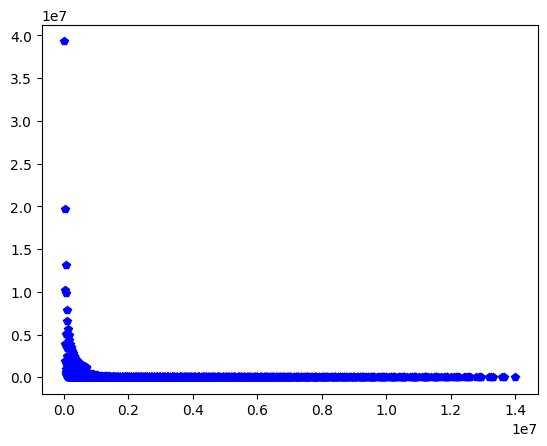

In [78]:
import tensorflow as tf
import pandas as pd
import numpy as np
from keras import layers
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, Conv2D, Normalization
from keras import Model
from sklearn.model_selection import train_test_split

np.set_printoptions(precision=3, suppress=True)
test_train= pd.read_csv("./data/first.csv" , names=["Fr","n","LifeTime"], skiprows=1)
plt.plot(test_train["n"], test_train["LifeTime"], "rd")
plt.show()
plt.plot(test_train["Fr"], test_train["LifeTime"], "rd")
plt.show()
plt.plot(test_train["n"]*test_train["Fr"], test_train["LifeTime"], "bp")
plt.show()

# Korellation

Desto höher die Drehzahl, sowie die Kraft der Belastung desto kürzer ist die Lebensdauer.


In [153]:
oof_train= pd.read_csv("./data/first.csv")


oof_train['Fr'] = oof_train['Fr'].astype(float)
oof_train['n'] = oof_train['n'].astype(float)

oof_train





,Fr,n,Lifetime
0,200.0,100.0,3.931553e+07
1,200.0,200.0,1.965777e+07
2,200.0,300.0,1.310518e+07
3,200.0,400.0,9.828883e+06
4,200.0,500.0,7.863106e+06
...,...,...,...
1360,4000.0,3100.0,5.840309e+01
1361,4000.0,3200.0,5.657799e+01
1362,4000.0,3300.0,5.486350e+01
1363,4000.0,3400.0,5.324987e+01


In [149]:
x_train, x_test, y_train, y_test = train_test_split(oof_train[['Fr', 'n']], oof_train['Lifetime'], shuffle= True,  train_size=0.9, test_size=0.1)


439      2995.992192
671      2215.653123
480      1831.133102
1209      128.615248
265     12444.280700
            ...     
631      9124.326355
1339      181.049566
1058      423.241607
1360       58.403086
268     10888.745620
Name: Lifetime, Length: 1228, dtype: float64

In [150]:
model = tf.keras.Sequential([
  layers.Dense(512, activation='relu', input_shape=[2]),
  layers.Dense(512, activation='relu')
])

model.compile(loss='mean_absolute_percentage_error',
              optimizer=tf.keras.optimizers.Adam())

model.fit(x_train, y_train, epochs=40, verbose=1)

test_loss = model.evaluate(x_test, y_test)


y_pred = model.predict(x_test)



Epoch 1/40
39/39 [==============================] - 1s 4ms/step - loss: 86.3437
Epoch 2/40
39/39 [==============================] - 0s 4ms/step - loss: 81.8396
Epoch 3/40
39/39 [==============================] - 0s 4ms/step - loss: 79.6257
Epoch 4/40
39/39 [==============================] - 0s 4ms/step - loss: 79.1601
Epoch 5/40
39/39 [==============================] - 0s 4ms/step - loss: 78.7427
Epoch 6/40
39/39 [==============================] - 0s 4ms/step - loss: 78.1212
Epoch 7/40
39/39 [==============================] - 0s 4ms/step - loss: 77.5836
Epoch 8/40
39/39 [==============================] - 0s 4ms/step - loss: 76.7682
Epoch 9/40
39/39 [==============================] - 0s 4ms/step - loss: 75.7481
Epoch 10/40
39/39 [==============================] - 0s 4ms/step - loss: 75.0015
Epoch 11/40
39/39 [==============================] - 0s 4ms/step - loss: 75.1170
Epoch 12/40
39/39 [==============================] - 0s 4ms/step - loss: 74.6120
Epoch 13/40
39/39 [==================

In [152]:
model.predict([[200,100]])

1/1 [==============================] - 0s 48ms/step


array([[7.836, 7.845, 7.84 , 7.923, 7.826, 8.126, 7.721, 7.416, 7.907,
        7.836, 8.024, 7.857, 7.773, 7.886, 7.427, 7.751, 7.828, 7.751,
        7.784, 7.535, 7.914, 7.842, 7.894, 7.991, 7.62 , 7.751, 7.891,
        7.915, 7.933, 7.972, 7.773, 0.   , 7.935, 7.737, 8.118, 7.666,
        8.077, 0.   , 7.666, 7.862, 7.908, 7.828, 7.872, 7.725, 7.883,
        7.512, 7.667, 7.692, 7.805, 7.737, 7.927, 7.792, 8.057, 8.031,
        7.736, 7.914, 7.635, 7.619, 8.048, 7.604, 8.011, 8.042, 0.   ,
        7.619, 7.436, 7.789, 7.901, 7.935, 7.804, 7.754, 7.488, 7.662,
        7.799, 7.761, 7.945, 7.782, 7.908, 7.711, 7.732, 7.975, 7.871,
        7.601, 0.   , 7.936, 7.832, 7.883, 7.888, 7.864, 7.527, 0.   ,
        7.945, 7.769, 7.859, 7.776, 7.931, 7.719, 7.667, 7.56 , 8.125,
        7.779, 7.769, 8.024, 7.959, 8.02 , 7.962, 7.898, 7.994, 7.655,
        8.058, 7.515, 7.612, 7.554, 7.783, 7.864, 7.998, 7.595, 7.604,
        7.725, 7.64 , 7.461, 8.035, 7.741, 7.606, 7.949, 0.   , 7.725,
      

In [139]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(numeric_features)
normalizer(numeric_features.iloc[:3])

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-1.683, -1.688],
       [-1.584, -1.688],
       [-1.485, -1.688]], dtype=float32)>

In [140]:
class MyModel(Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.conv1 = Conv2D(1, 3, activation='relu')
    self.flatten = Flatten()
    self.d1 = Dense(128, activation='relu')
    self.d2 = Dense(10)

  def call(self, x):
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)

model = MyModel()


In [85]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

optimizer = tf.keras.optimizers.Adam()

In [86]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')


In [87]:
@tf.function
def train_step(images1, labels1):
  with tf.GradientTape() as tape:
    # training=True is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    predictions = model(images1, training=True)
    loss = loss_object(labels1, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels1, predictions)

In [88]:
@tf.function
def test_step(images, labels):
  # training=False is only needed if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  predictions = model(images)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [89]:
numeric_dataset = tf.data.Dataset.from_tensor_slices((numeric_features, target))
print(numeric_dataset)

<_TensorSliceDataset element_spec=(TensorSpec(shape=(2,), dtype=tf.int64, name=None), TensorSpec(shape=(), dtype=tf.float64, name=None))>


In [90]:
EPOCHS = 5

for epoch in range(EPOCHS):
  # Reset the metrics at the start of the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  for images, labels in numeric_dataset :
    train_step( images, labels)



  print(
    f'Epoch {epoch + 1}, '
    f'Loss: {train_loss.result()}, '
    f'Accuracy: {train_accuracy.result() * 100}, '
    f'Test Loss: {test_loss.result()}, '
    f'Test Accuracy: {test_accuracy.result() * 100}'
  )

ValueError: in user code:

    File "C:\Users\Sasha\AppData\Local\Temp\ipykernel_5060\785777595.py", line 6, in train_step  *
        predictions = model(images1, training=True)
    File "C:\Users\Sasha\PycharmProjects\deep-groove-with-tensorflow\venv\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler  **
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Sasha\AppData\Local\Temp\__autograph_generated_fileeccpev7j.py", line 10, in tf__call
        x = ag__.converted_call(ag__.ld(self).conv1, (ag__.ld(x),), None, fscope)

    ValueError: Exception encountered when calling layer 'my_model_2' (type MyModel).
    
    in user code:
    
        File "C:\Users\Sasha\AppData\Local\Temp\ipykernel_5060\936090391.py", line 10, in call  *
            x = self.conv1(x)
        File "C:\Users\Sasha\PycharmProjects\deep-groove-with-tensorflow\venv\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler  **
            raise e.with_traceback(filtered_tb) from None
        File "C:\Users\Sasha\PycharmProjects\deep-groove-with-tensorflow\venv\lib\site-packages\keras\engine\input_spec.py", line 253, in assert_input_compatibility
            raise ValueError(
    
        ValueError: Input 0 of layer "conv2d_2" is incompatible with the layer: expected min_ndim=4, found ndim=1. Full shape received: (2,)
    
    
    Call arguments received by layer 'my_model_2' (type MyModel):
      • x=tf.Tensor(shape=(2,), dtype=int64)
